<a href="https://colab.research.google.com/github/rachmazamalia/Capstone-Project/blob/main/Fruit_Vegetable_Freshness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA PREPARATION**

In [2]:
!pip install kaggle -q

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
from PIL import Image
import random

In [5]:
# Download Dataset 1
!kaggle datasets download -d alibaloch/vegetables-fruits-fresh-and-stale
# Download Dataset 2
!kaggle datasets download -d shivanir23/good-and-bad-fruits-ieee-extended

 99% 978M/986M [00:10<00:00, 77.3MB/s]
100% 986M/986M [00:10<00:00, 96.4MB/s]
 95% 193M/202M [00:02<00:00, 101MB/s]
100% 202M/202M [00:02<00:00, 103MB/s]


In [6]:
!mkdir dataset
!mkdir dataset/train
!mkdir dataset/test

**DATASET 1**

In [7]:
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/freshapples/*" -d "dataset/train/freshapples"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/freshbanana/*" -d "dataset/train/freshbanana"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/freshcucumber/*" -d "dataset/train/freshcucumber"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/freshokra/*" -d "dataset/train/freshokra"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/freshpatato/*" -d "dataset/train/freshpotato"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/freshtamto/*" -d "dataset/train/freshtomato"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/rottenapples/*" -d "dataset/train/rottenapples"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/rottenbanana/*" -d "dataset/train/rottenbanana"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/rottencucumber/*" -d "dataset/train/rottencucumber"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/rottenokra/*" -d "dataset/train/rottenokra"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/rottenpatato/*" -d "dataset/train/rottenpotato"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/rottentamto/*" -d "dataset/train/rottentomato"

In [8]:
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/freshapples/*" -d "dataset/test/freshapples"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/freshbanana/*" -d "dataset/test/freshbanana"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/freshcucumber/*" -d "dataset/test/freshcucumber"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/freshokra/*" -d "dataset/test/freshokra"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/freshpatato/*" -d "dataset/test/freshpotato"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/freshtamto/*" -d "dataset/test/freshtomato"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/rottenapples/*" -d "dataset/test/rottenapples"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/rottenbanana/*" -d "dataset/test/rottenbanana"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/rottencucumber/*" -d "dataset/test/rottencucumber"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/rottenokra/*" -d "dataset/test/rottenokra"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/rottenpatato/*" -d "dataset/test/rottenpotato"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/rottentamto/*" -d "dataset/test/rottentomato"

**DATASET 2**

In [9]:
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Guava_Good/*" -d "dataset/train/freshguava"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Lime_Good/*" -d "dataset/train/freshlime"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Orange_Good/*" -d "dataset/train/freshorange"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Pomegranate_Good/*" -d "dataset/train/freshpomegranate"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Guava_Bad/*" -d "dataset/train/rottenguava"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Lime_Bad/*" -d "dataset/train/rottenlime"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Orange_Bad/*" -d "dataset/train/rottenorange"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Pomegranate_Bad/*" -d "dataset/train/rottenpomegranate"

In [10]:
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Guava_Good/*" -d "dataset/test/freshguava"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Lime_Good/*" -d "dataset/test/freshlime"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Orange_Good/*" -d "dataset/test/freshorange"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Pomegranate_Good/*" -d "dataset/test/freshpomegranate"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Guava_Bad/*" -d "dataset/test/rottenguava"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Lime_Bad/*" -d "dataset/test/rottenlime"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Orange_Bad/*" -d "dataset/test/rottenorange"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Pomegranate_Bad/*" -d "dataset/test/rottenpomegranate"

In [11]:
class_names = sorted(os.listdir('dataset/train/'))
print(class_names)

['freshapples', 'freshbanana', 'freshcucumber', 'freshguava', 'freshlime', 'freshokra', 'freshorange', 'freshpomegranate', 'freshpotato', 'freshtomato', 'rottenapples', 'rottenbanana', 'rottencucumber', 'rottenguava', 'rottenlime', 'rottenokra', 'rottenorange', 'rottenpomegranate', 'rottenpotato', 'rottentomato']


In [12]:
!ls

dataset				       sample_data
good-and-bad-fruits-ieee-extended.zip  vegetables-fruits-fresh-and-stale.zip
kaggle.json


(214, 196)


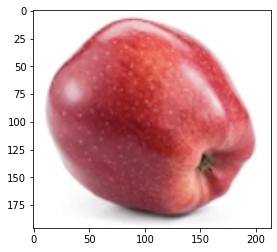

In [13]:
from keras.preprocessing.image import load_img
filenames = os.listdir('dataset/train/freshapples')
sample = random.choice(filenames)
image = load_img('dataset/train/freshapples/'+sample)
plt.imshow(image)
print(image.size)

In [14]:
def show_random_images_from(glob_path, seed):
    if seed:
        random.seed(seed)
    r = random.sample(glob(glob_path), 8)
    plt.figure(figsize=(10,6))
    for i, k in enumerate(r):
        plt.subplot(241 + i)
        plt.imshow(Image.open(k))
        plt.axis('off')

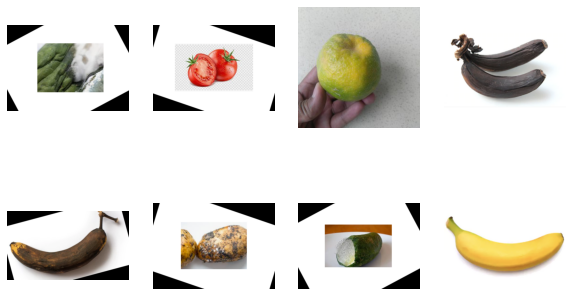

In [15]:
show_random_images_from("dataset/*/*/*", seed=420)

In [16]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [17]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # randomly rotate images 
    zoom_range=0.1,  # randomly zoom image
   # width_shift_range=0.1,  # randomly shift images horizontally 
   # height_shift_range=0.1,  # randomly shift images vertically 
    horizontal_flip=True,  # randomly flip images horizontally
    fill_mode='nearest') 

train_generator = datagen.flow_from_directory(
    '/content/dataset/train', 
    target_size=(150, 150),
    batch_size=126,
	  class_mode='categorical')

test_generator = datagen.flow_from_directory(
    '/content/dataset/test',
     target_size=(150, 150),
     batch_size=126,
	   class_mode='categorical')

Found 14216 images belonging to 20 classes.
Found 6053 images belonging to 20 classes.


In [18]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(20, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 20)                3504660   
                                                                 
Total params: 3,505,556
Trainable params: 3,505,556
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(train_generator,
    epochs=10,
    validation_data=test_generator,
    batch_size=64
    )

Epoch 1/10
113/113 [==============================] - 332s 3s/step - loss: 1.9434 - accuracy: 0.6120 - val_loss: 0.6510 - val_accuracy: 0.7685
Epoch 2/10
113/113 [==============================] - 327s 3s/step - loss: 0.4929 - accuracy: 0.8336 - val_loss: 0.4527 - val_accuracy: 0.8393
Epoch 3/10
113/113 [==============================] - 326s 3s/step - loss: 0.3954 - accuracy: 0.8639 - val_loss: 0.4131 - val_accuracy: 0.8528
Epoch 4/10
113/113 [==============================] - 325s 3s/step - loss: 0.3349 - accuracy: 0.8808 - val_loss: 0.3825 - val_accuracy: 0.8614
Epoch 5/10
113/113 [==============================] - 324s 3s/step - loss: 0.2998 - accuracy: 0.8960 - val_loss: 0.3347 - val_accuracy: 0.8766
Epoch 6/10
113/113 [==============================] - 325s 3s/step - loss: 0.2679 - accuracy: 0.9056 - val_loss: 0.3390 - val_accuracy: 0.8777
Epoch 7/10
113/113 [==============================] - 327s 3s/step - loss: 0.2619 - accuracy: 0.9083 - val_loss: 0.3209 - val_accuracy: 0.8830

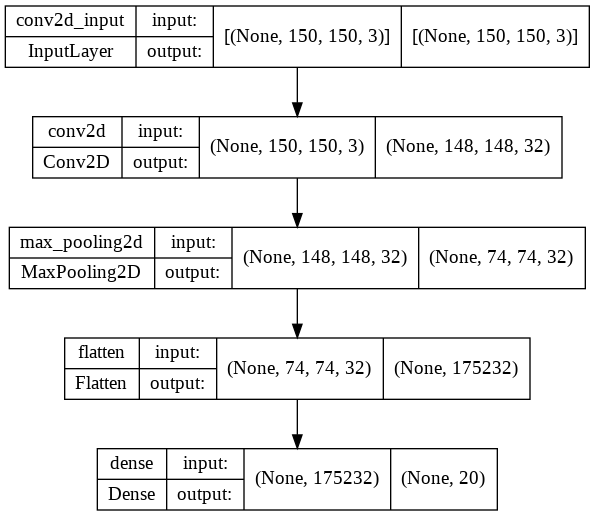

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

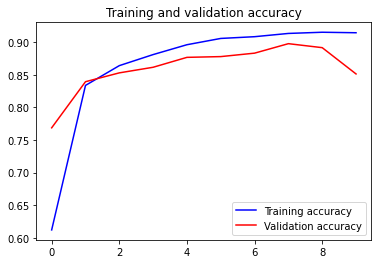

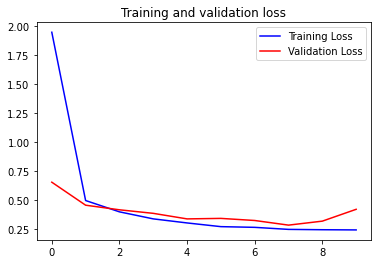

In [22]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [72]:
scores = model.evaluate(test_generator)
scores = model.evaluate(train_generator)

113/113 [==============================] - 158s 1s/step - loss: 0.3197 - accuracy: 0.8859


In [26]:
!mkdir randompict
!mkdir randompict/banana

mkdir: cannot create directory ‘randompict’: File exists


Prediction for Image Below: freshpotato


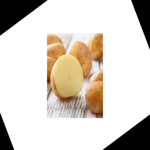

In [70]:
import PIL
import numpy as np

image_path = "/content/dataset/test/freshpotato/p_f005.png"

image = PIL.Image.open(image_path)
image_resized = image.resize((150, 150))
image_array = np.array(image_resized).reshape(1, 150, 150, 3)

print("Prediction for Image Below:", class_names[np.argmax(model.predict(image_array))])
image_resized

# **TRANSFER LEARNING**

In [73]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras import backend as K

In [74]:
base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_initializer="he_normal")(x)
predictions = Dense(len(class_names), activation='softmax')(x)
transfer_model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
  layer.trainable = False 

transfer_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

87924736/87910968 [==============================] - 1s 0us/step


In [76]:
transfer_model.fit(
    train_generator, 
    validation_data = test_generator, 
    epochs=3
    )

Epoch 1/3
113/113 [==============================] - 904s 8s/step - loss: 0.2682 - accuracy: 0.9131 - val_loss: 0.2328 - val_accuracy: 0.9243
Epoch 2/3
113/113 [==============================] - 906s 8s/step - loss: 0.2002 - accuracy: 0.9316 - val_loss: 0.1773 - val_accuracy: 0.9399
Epoch 3/3
113/113 [==============================] - 898s 8s/step - loss: 0.1665 - accuracy: 0.9446 - val_loss: 0.1372 - val_accuracy: 0.9544


In [78]:
scores = transfer_model.evaluate(test_generator)
scores = transfer_model.evaluate(train_generator)

113/113 [==============================] - 630s 6s/step - loss: 0.1148 - accuracy: 0.9617


Prediction for Image Below: rottenbanana


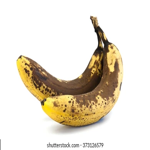

In [94]:
import PIL
import numpy as np

image_path = "/content/randompict/banana/rottenbanana2.webp"

image = PIL.Image.open(image_path)
image_resized = image.resize((150, 150))
image_array = np.array(image_resized).reshape(1, 150, 150, 3)

print("Prediction for Image Below:", class_names[np.argmax(model.predict(image_array))])
image_resized